
# 1 - Importación de Librerías Utilizadas



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from math import log2
from sklearn.preprocessing import PowerTransformer, LabelEncoder, MinMaxScaler, StandardScaler
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

# 2 - Se Carga el Conjunto de Datos
*   Se anexa el dataset guardado en esta misma carpeta de Drive

### "Adidas Sales Dataset"

In [ ]:
sheet_id = '1qfcwA4SUnP-AHcoDmT-IIhPw5ulhWdpP'
sheet_name = 'Hoja1'
csv_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
df = pd.read_csv(csv_url)

# 3 -Comprender la Estructura del Conjunto de Datos

*   Agrego el head por separado porque sino el formato en que lo imprime Google Colab dificulta la visualización
* Se puede observar que la primer columna no contiene ninguna información útil, se puede eliminar.

In [ ]:
df.head(15)

,Unnamed: 0,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,"$50,00",1.20,$600.000,$300.000,50%,In-store
1,NaN,Foot Locker,1185732,2/1/2020,Northeast,New York,New York,Men's Athletic Footwear,"$50,00",1.00,$500.000,$150.000,30%,In-store
2,NaN,Foot Locker,1185732,3/1/2020,Northeast,New York,New York,Women's Street Footwear,"$40,00",1.00,$400.000,$140.000,35%,In-store
3,NaN,Foot Locker,1185732,4/1/2020,Northeast,New York,New York,Women's Athletic Footwear,"$45,00",850.00,$382.500,$133.875,35%,In-store
4,NaN,Foot Locker,1185732,5/1/2020,Northeast,New York,New York,Men's Apparel,"$60,00",900.00,$540.000,$162.000,30%,In-store
5,NaN,Foot Locker,1185732,6/1/2020,Northeast,New York,New York,Women's Apparel,"$50,00",1.00,$500.000,$125.000,25%,In-store
6,NaN,Foot Locker,1185732,7/1/2020,Northeast,New York,New York,Men's Street Footwear,"$50,00",1.25,$625.000,$312.500,50%,In-store
7,NaN,Foot Locker,1185732,8/1/2020,Northeast,New York,New York,Men's Athletic Footwear,"$50,00",900.00,$450.000,$135.000,30%,Outlet
8,NaN,Foot Locker,1185732,21/1/2020,Northeast,New York,New York,Women's Street Footwear,"$40,00",950.00,$380.000,$133.000,35%,Outlet
9,NaN,Foot Locker,1185732,22/1/2020,Northeast,New York,New York,Women's Athletic Footwear,"$45,00",825.00,$371.250,$129.938,35%,Outlet


Con "df.info()" (y shape) observamos que el dataset consta de 13 columnas:
* 3 son de tipo numérico (de los cuales 2 son float)
* Los 10 restantes son de un tipo "object"
     * Se detectan como "object" varios valores que son porcentajes, precios. Deben de tratarse para poder calcular valores respecto de esas columnas.

In [ ]:
df.info()
print("--"*20)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         0 non-null      float64
 1   Retailer                           9648 non-null   object 
 2   Adidas Sales Database Retailer ID  9648 non-null   int64  
 3   Invoice Date                       9648 non-null   object 
 4   Region                             9648 non-null   object 
 5   State                              9648 non-null   object 
 6   City                               9648 non-null   object 
 7   Product                            9648 non-null   object 
 8   Price per Unit                     9648 non-null   object 
 9   Units Sold                         9648 non-null   float64
 10  Total Sales                        9648 non-null   object 
 11  Operating Profit                   9648 non-null   objec

(9648, 14)

No obtenemos la información estadística básica de muchas columnas debido a que su formato no es exactamente numérico, como el porcentaje o monedas.

In [ ]:
df.describe(include ="all")

,Unnamed: 0,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,0.0,9648,9.648000e+03,9648,9648,9648,9648,9648,9648,9648.000000,9648,9648,9648,9648
unique,NaN,6,NaN,724,5,50,52,6,94,NaN,3138,4187,66,3
top,NaN,Foot Locker,NaN,17/1/2021,West,Texas,Portland,Men's Street Footwear,"$50,00",NaN,$100.000,$63.000,35%,Online
freq,NaN,2637,NaN,77,2448,432,360,1610,675,NaN,67,39,1309,4889
mean,NaN,NaN,1.173850e+06,NaN,NaN,NaN,NaN,NaN,NaN,250.989674,NaN,NaN,NaN,NaN
std,NaN,NaN,2.636038e+04,NaN,NaN,NaN,NaN,NaN,NaN,206.027554,NaN,NaN,NaN,NaN
min,NaN,NaN,1.128299e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.185732e+06,NaN,NaN,NaN,NaN,NaN,NaN,105.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.185732e+06,NaN,NaN,NaN,NaN,NaN,NaN,175.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.185732e+06,NaN,NaN,NaN,NaN,NaN,NaN,325.000000,NaN,NaN,NaN,NaN


# 4 - Identificar valores faltantes


Podemos observar como la primer columna se rellenó de valores nulos en todas las filas, no aporta ninguna información, por lo que la podemos eliminar más adelante.

Valores faltantes por columna
Unnamed: 0                           9648
Retailer                                0
Adidas Sales Database Retailer ID       0
Invoice Date                            0
Region                                  0
State                                   0
City                                    0
Product                                 0
Price per Unit                          0
Units Sold                              0
Total Sales                             0
Operating Profit                        0
Operating Margin                        0
Sales Method                            0
dtype: int64


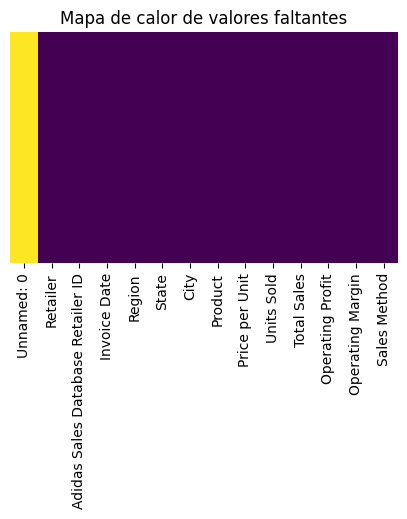

In [ ]:
print("Valores faltantes por columna")
print(df.isnull().sum())
# Visualizar los valores faltantes con un mapa de calor
plt.figure(figsize=(5, 3))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores faltantes")
plt.show()

# 5 - Manejo de valores faltantes
* Solamente tenemos valores faltantes en la primer columna (y es en toda) por lo que la podemos eliminar

In [ ]:
df_cleaned = df.dropna(axis=1)
print(df_cleaned.head())

      Retailer  Adidas Sales Database Retailer ID Invoice Date     Region  \
0  Foot Locker                            1185732     1/1/2020  Northeast   
1  Foot Locker                            1185732     2/1/2020  Northeast   
2  Foot Locker                            1185732     3/1/2020  Northeast   
3  Foot Locker                            1185732     4/1/2020  Northeast   
4  Foot Locker                            1185732     5/1/2020  Northeast   

      State      City                    Product Price per Unit  Units Sold  \
0  New York  New York      Men's Street Footwear        $50,00          1.2   
1  New York  New York    Men's Athletic Footwear        $50,00          1.0   
2  New York  New York    Women's Street Footwear        $40,00          1.0   
3  New York  New York  Women's Athletic Footwear        $45,00        850.0   
4  New York  New York              Men's Apparel        $60,00        900.0   

  Total Sales Operating Profit Operating Margin Sales Method  

## Antes de pasar al punto 6, voy a normalizar las columnas a un valor numérico, así podemos visualizar los outliers de cada una.
Las columnas a tratar de esta manera son:
* Price per Unit: varias unidades están mal ingresada, ya sea que estén multiplicadas por 100 o divididas por 10, se recalcula toda una columna completa. Y se elimina la anterior.
* Total Sales: se expresa el valor monetario en numérico quitándole los "00" extras.
* Operating Profit: se expresa el valor monetario en numérico quitándole los "00" extras.
* Operating Margin: se expresa el porcentaje con valores entre 0 y 1.


In [ ]:
def limpiar_columnas_punto(df, columnas_punto=[]):
    for col in columnas_punto:
        df[col] = df[col].astype(str).str.replace('$', '', regex=False)
        df[col] = df[col].astype(float).round(2)
    return df

df_cleaned = df.dropna(axis=1) # Descomentar esta línea si se quiere volver a ejecutar
df_cleaned = limpiar_columnas_punto(df_cleaned, columnas_punto=["Total Sales", "Operating Profit"])
df_cleaned.head(5)

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,"$50,00",1.2,600.0,300.0,50%,In-store
1,Foot Locker,1185732,2/1/2020,Northeast,New York,New York,Men's Athletic Footwear,"$50,00",1.0,500.0,150.0,30%,In-store
2,Foot Locker,1185732,3/1/2020,Northeast,New York,New York,Women's Street Footwear,"$40,00",1.0,400.0,140.0,35%,In-store
3,Foot Locker,1185732,4/1/2020,Northeast,New York,New York,Women's Athletic Footwear,"$45,00",850.0,382.5,133.9,35%,In-store
4,Foot Locker,1185732,5/1/2020,Northeast,New York,New York,Men's Apparel,"$60,00",900.0,540.0,162.0,30%,In-store


In [ ]:
def limpiar_columnas_coma(df, columnas_coma=[]):
  for col in columnas_coma:
    df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '.').str.strip()
    df[col] = df[col].astype(float).round(2)
  return df
df_cleaned = limpiar_columnas_coma(df_cleaned, columnas_coma=["Price per Unit"])
df_cleaned.head(5)

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1.2,600.0,300.0,50%,In-store
1,Foot Locker,1185732,2/1/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1.0,500.0,150.0,30%,In-store
2,Foot Locker,1185732,3/1/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1.0,400.0,140.0,35%,In-store
3,Foot Locker,1185732,4/1/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382.5,133.9,35%,In-store
4,Foot Locker,1185732,5/1/2020,Northeast,New York,New York,Men's Apparel,60.0,900.0,540.0,162.0,30%,In-store


In [ ]:
def limpiar_columnas_porcentaje(df, columnas_porcentaje=[]):
  for col in columnas_porcentaje:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False).str.strip()
    df[col] = df[col].astype(float).round(2)/100
  return df

df_cleaned = limpiar_columnas_porcentaje(df_cleaned, columnas_porcentaje=["Operating Margin"])
df_cleaned.head(5)

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1.2,600.0,300.0,0.50,In-store
1,Foot Locker,1185732,2/1/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1.0,500.0,150.0,0.30,In-store
2,Foot Locker,1185732,3/1/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1.0,400.0,140.0,0.35,In-store
3,Foot Locker,1185732,4/1/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382.5,133.9,0.35,In-store
4,Foot Locker,1185732,5/1/2020,Northeast,New York,New York,Men's Apparel,60.0,900.0,540.0,162.0,0.30,In-store


In [ ]:
df_cleaned["Units Sold Cleaned"] = (df_cleaned["Total Sales"] / df_cleaned["Price per Unit"]).round(2)
df_cleaned.head(5)
df_cleaned = df_cleaned.drop("Units Sold", axis=1)
df_cleaned.head(5)

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,600.0,300.0,0.50,In-store,12.0
1,Foot Locker,1185732,2/1/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,500.0,150.0,0.30,In-store,10.0
2,Foot Locker,1185732,3/1/2020,Northeast,New York,New York,Women's Street Footwear,40.0,400.0,140.0,0.35,In-store,10.0
3,Foot Locker,1185732,4/1/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,382.5,133.9,0.35,In-store,8.5
4,Foot Locker,1185732,5/1/2020,Northeast,New York,New York,Men's Apparel,60.0,540.0,162.0,0.30,In-store,9.0


# 6 - Identificar y manejar valores atípicos (outliers)
* Utilizamos dos técnicas:
    * Rango intercuartílico (IQR)
    * Puntuación Z-Score
* ¿En qué columnas?:
    * Price per Unit
    * Total Sales
    * Operating Profit
    * Operating Margin
    * Units Sold Cleaned

## Z-Score

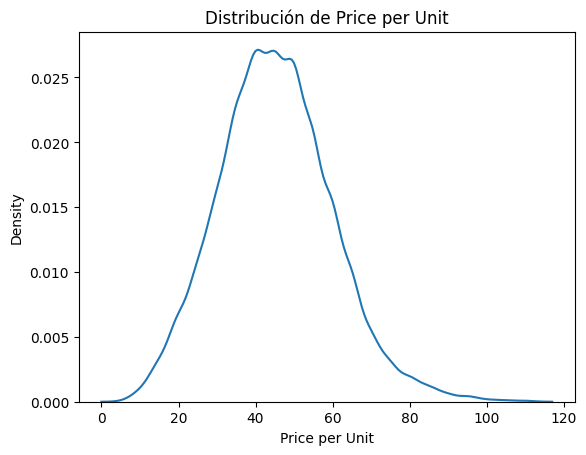

Outliers detectados:
Outliers:
        Retailer                  Product  Price per Unit
679   West Gear          Women's Apparel           100.0
685   West Gear          Women's Apparel           100.0
708   West Gear            Men's Apparel            90.0
709   West Gear          Women's Apparel            95.0
714   West Gear            Men's Apparel            90.0
...         ...                      ...             ...
5857  West Gear            Men's Apparel            92.0
5858  West Gear          Women's Apparel           100.0
5860  West Gear  Men's Athletic Footwear            92.0
5861  West Gear  Women's Street Footwear            90.0
5864  West Gear          Women's Apparel           103.0

[62 rows x 3 columns]


,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
679,West Gear,1128299,30/6/2020,West,Washington,Seattle,Women's Apparel,100.0,675.0,135.0,0.20,In-store,6.75
685,West Gear,1128299,6/7/2020,West,Washington,Seattle,Women's Apparel,100.0,575.0,115.0,0.20,In-store,5.75
708,West Gear,1128299,29/7/2020,West,Washington,Seattle,Men's Apparel,90.0,382.5,95.6,0.25,In-store,4.25
709,West Gear,1128299,30/7/2020,West,Washington,Seattle,Women's Apparel,95.0,522.5,104.5,0.20,In-store,5.50
714,West Gear,1128299,4/8/2020,West,Washington,Seattle,Men's Apparel,90.0,427.5,106.9,0.25,In-store,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857,West Gear,1128299,17/6/2021,South,Louisiana,New Orleans,Men's Apparel,92.0,10.8,6.1,0.57,Online,0.12
5858,West Gear,1128299,17/6/2021,South,Louisiana,New Orleans,Women's Apparel,100.0,19.5,9.4,0.48,Online,0.20
5860,West Gear,1128299,16/7/2021,South,Louisiana,New Orleans,Men's Athletic Footwear,92.0,18.7,10.3,0.55,Online,0.20
5861,West Gear,1128299,16/7/2021,South,Louisiana,New Orleans,Women's Street Footwear,90.0,17.6,9.5,0.54,Online,0.20


In [ ]:
def detectar_outliers_zscore(df, columna_objetivo, umbral=3):
    # Visualización
    sns.kdeplot(df[columna_objetivo])
    plt.title(f'Distribución de {columna_objetivo}')
    plt.show()

    # Cálculo del z-score
    z_scores = stats.zscore(df[columna_objetivo].dropna())
    z_scores_full = np.full(df.shape[0], np.nan)
    z_scores_full[df[columna_objetivo].notna()] = z_scores

    # Identificación de outliers
    outliers = df[(z_scores_full < -umbral) | (z_scores_full > umbral)]

    # Mostrar columnas seleccionadas
    print("Outliers detectados:")
    print("Outliers:\n",outliers[["Retailer", "Product", columna_objetivo]])
    return outliers #Para posteriormente eliminarlos en caso de usar Z-Score
# Price per Unit
detectar_outliers_zscore(df_cleaned, "Price per Unit")

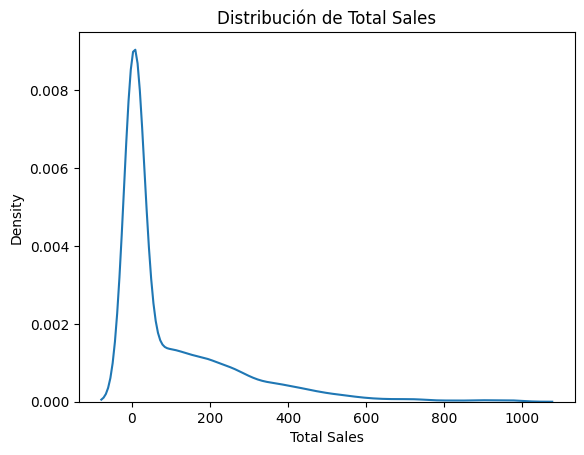

Outliers detectados:
Outliers:
            Retailer                    Product  Total Sales
0       Foot Locker      Men's Street Footwear        600.0
6       Foot Locker      Men's Street Footwear        625.0
12      Foot Locker      Men's Street Footwear        610.0
18      Foot Locker      Men's Street Footwear        600.0
24      Foot Locker      Men's Street Footwear        732.0
...             ...                        ...          ...
9402    Foot Locker  Women's Athletic Footwear        960.0
9408    Foot Locker  Women's Athletic Footwear        897.0
9409    Foot Locker              Men's Apparel        920.0
9426  Sports Direct  Women's Athletic Footwear        825.0
9444  Sports Direct  Women's Athletic Footwear        897.0

[196 rows x 3 columns]


,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,600.0,300.0,0.50,In-store,12.0
6,Foot Locker,1185732,7/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,625.0,312.5,0.50,In-store,12.5
12,Foot Locker,1185732,25/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,610.0,305.0,0.50,Outlet,12.2
18,Foot Locker,1185732,31/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,600.0,300.0,0.50,Outlet,12.0
24,Foot Locker,1185732,6/2/2020,Northeast,New York,New York,Men's Street Footwear,60.0,732.0,366.0,0.50,Outlet,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,Foot Locker,1185732,6/9/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,30.0,960.0,442.0,0.46,Outlet,32.0
9408,Foot Locker,1185732,8/10/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,39.0,897.0,404.0,0.45,Outlet,23.0
9409,Foot Locker,1185732,8/10/2021,Northeast,Rhode Island,Providence,Men's Apparel,40.0,920.0,304.0,0.33,Outlet,23.0
9426,Sports Direct,1185732,17/1/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,25.0,825.0,256.0,0.31,Outlet,33.0


In [ ]:
# Total Sales
detectar_outliers_zscore(df_cleaned, "Total Sales")

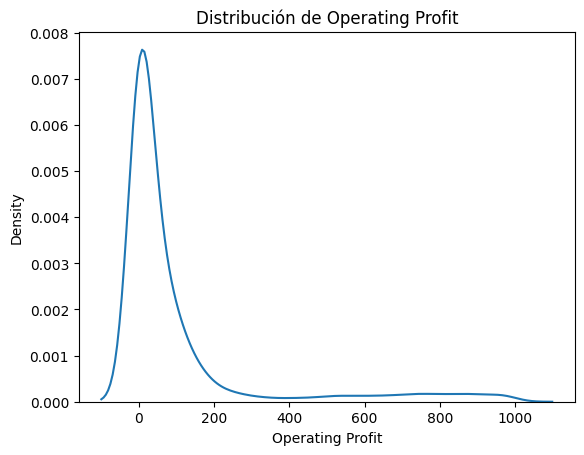

Outliers detectados:
Outliers:
          Retailer                    Product  Operating Profit
4180  Foot Locker    Women's Street Footwear             898.0
4191  Foot Locker    Men's Athletic Footwear             972.0
4192  Foot Locker    Women's Street Footwear             726.0
4198  Foot Locker    Women's Street Footwear             992.0
4200  Foot Locker              Men's Apparel             950.0
...           ...                        ...               ...
9589       Amazon              Men's Apparel             805.0
9624  Foot Locker  Women's Athletic Footwear             859.0
9625  Foot Locker              Men's Apparel             928.0
9641  Foot Locker    Women's Street Footwear             936.0
9643  Foot Locker              Men's Apparel             896.0

[449 rows x 3 columns]


,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
4180,Foot Locker,1185732,8/6/2021,Midwest,Illinois,Chicago,Women's Street Footwear,32.0,2.0,898.0,0.46,Online,0.06
4191,Foot Locker,1185732,19/6/2021,Midwest,Illinois,Chicago,Men's Athletic Footwear,48.0,2.1,972.0,0.46,Online,0.04
4192,Foot Locker,1185732,20/6/2021,Midwest,Illinois,Chicago,Women's Street Footwear,36.0,1.5,726.0,0.48,Online,0.04
4198,Foot Locker,1185732,26/6/2021,Midwest,Illinois,Chicago,Women's Street Footwear,49.0,2.2,992.0,0.46,Online,0.04
4200,Foot Locker,1185732,28/6/2021,Midwest,Illinois,Chicago,Men's Apparel,59.0,2.1,950.0,0.46,Online,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9589,Amazon,1185732,18/4/2021,Northeast,New Hampshire,Manchester,Men's Apparel,40.0,2.4,805.0,0.33,Outlet,0.06
9624,Foot Locker,1185732,19/10/2021,Northeast,New Hampshire,Manchester,Women's Athletic Footwear,44.0,2.7,859.0,0.32,Outlet,0.06
9625,Foot Locker,1185732,19/10/2021,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,2.9,928.0,0.32,Outlet,0.06
9641,Foot Locker,1185732,24/1/2021,Northeast,New Hampshire,Manchester,Women's Street Footwear,35.0,3.5,936.0,0.27,Outlet,0.10


In [ ]:
# Operating Profit
detectar_outliers_zscore(df_cleaned, "Operating Profit")

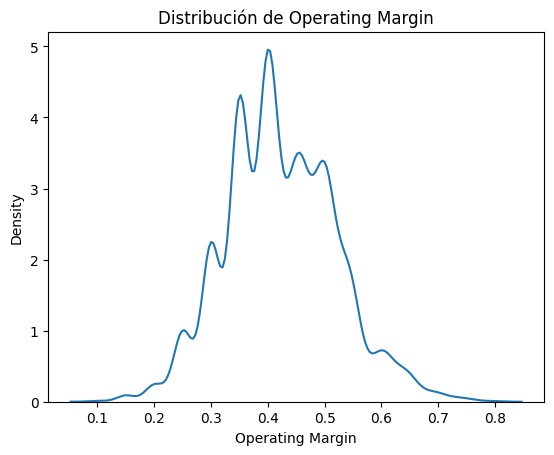

Outliers detectados:
Outliers:
            Retailer                    Product  Operating Margin
193       West Gear            Women's Apparel              0.10
199       West Gear            Women's Apparel              0.10
205       West Gear            Women's Apparel              0.10
211       West Gear            Women's Apparel              0.10
4422      West Gear              Men's Apparel              0.74
4488      West Gear              Men's Apparel              0.76
4494      West Gear              Men's Apparel              0.77
4506      West Gear              Men's Apparel              0.73
4752         Kohl's              Men's Apparel              0.75
4758         Kohl's              Men's Apparel              0.72
4770         Kohl's              Men's Apparel              0.74
4776         Kohl's              Men's Apparel              0.74
4782         Kohl's              Men's Apparel              0.74
4800         Kohl's              Men's Apparel            

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
193,West Gear,1128299,29/1/2021,West,California,San Francisco,Women's Apparel,70.0,542.5,54.2,0.10,Outlet,7.75
199,West Gear,1128299,4/2/2021,West,California,San Francisco,Women's Apparel,70.0,490.0,49.0,0.10,Outlet,7.00
205,West Gear,1128299,10/2/2021,West,California,San Francisco,Women's Apparel,70.0,542.5,54.2,0.10,Outlet,7.75
211,West Gear,1128299,16/2/2021,West,California,San Francisco,Women's Apparel,70.0,560.0,56.0,0.10,Outlet,8.00
4422,West Gear,1128299,5/2/2020,West,Nevada,Las Vegas,Men's Apparel,59.0,4.8,3.5,0.74,Online,0.08
4488,West Gear,1128299,12/4/2020,West,Colorado,Denver,Men's Apparel,63.0,2.8,2.1,0.76,Online,0.04
4494,West Gear,1128299,18/4/2020,West,Colorado,Denver,Men's Apparel,66.0,6.0,4.6,0.77,Online,0.09
4506,West Gear,1128299,30/4/2020,West,Colorado,Denver,Men's Apparel,74.0,10.4,7.6,0.73,Online,0.14
4752,Kohl's,1189833,1/1/2021,Midwest,Montana,Billings,Men's Apparel,47.0,3.6,2.7,0.75,Online,0.08
4758,Kohl's,1189833,7/1/2021,Midwest,Montana,Billings,Men's Apparel,48.0,2.8,2.0,0.72,Online,0.06


In [ ]:
# Operating Margin
detectar_outliers_zscore(df_cleaned, "Operating Margin")

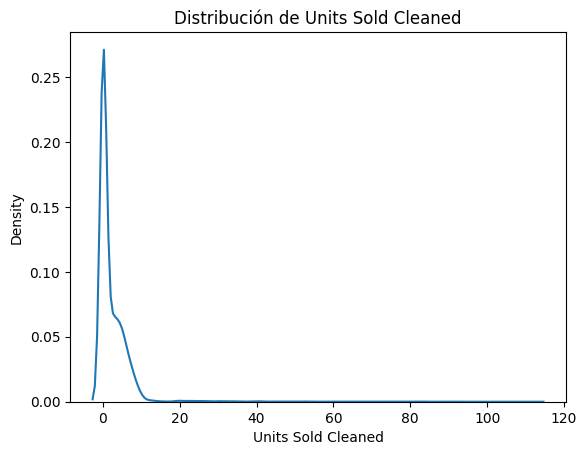

Outliers detectados:
Outliers:
            Retailer                    Product  Units Sold Cleaned
4193    Foot Locker  Women's Athletic Footwear                20.0
4337    Foot Locker  Women's Athletic Footwear                20.0
4679    Foot Locker  Women's Athletic Footwear                26.0
4685    Foot Locker  Women's Athletic Footwear                20.0
4696    Foot Locker    Women's Street Footwear                26.0
...             ...                        ...                 ...
9402    Foot Locker  Women's Athletic Footwear                32.0
9408    Foot Locker  Women's Athletic Footwear                23.0
9409    Foot Locker              Men's Apparel                23.0
9426  Sports Direct  Women's Athletic Footwear                33.0
9444  Sports Direct  Women's Athletic Footwear                39.0

[119 rows x 3 columns]


,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
4193,Foot Locker,1185732,21/6/2021,Midwest,Illinois,Chicago,Women's Athletic Footwear,44.0,880.0,440.0,0.50,Online,20.0
4337,Foot Locker,1185732,12/11/2021,Northeast,Pennsylvania,Philadelphia,Women's Athletic Footwear,42.0,840.0,386.0,0.46,Online,20.0
4679,Foot Locker,1185732,20/10/2020,Southeast,Florida,Miami,Women's Athletic Footwear,29.0,754.0,339.0,0.45,Online,26.0
4685,Foot Locker,1185732,26/10/2020,Midwest,Minnesota,Minneapolis,Women's Athletic Footwear,27.0,540.0,254.0,0.47,Online,20.0
4696,Foot Locker,1185732,6/11/2020,Midwest,Minnesota,Minneapolis,Women's Street Footwear,29.0,754.0,332.0,0.44,Online,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,Foot Locker,1185732,6/9/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,30.0,960.0,442.0,0.46,Outlet,32.0
9408,Foot Locker,1185732,8/10/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,39.0,897.0,404.0,0.45,Outlet,23.0
9409,Foot Locker,1185732,8/10/2021,Northeast,Rhode Island,Providence,Men's Apparel,40.0,920.0,304.0,0.33,Outlet,23.0
9426,Sports Direct,1185732,17/1/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,25.0,825.0,256.0,0.31,Outlet,33.0


In [ ]:
# Units Sold Cleaned
detectar_outliers_zscore(df_cleaned, "Units Sold Cleaned")

## Rango Intercuartílico (IQR)

Outliers detectados:
Outliers:
          Retailer                    Product  Price per Unit
679     West Gear            Women's Apparel           100.0
685     West Gear            Women's Apparel           100.0
708     West Gear              Men's Apparel            90.0
709     West Gear            Women's Apparel            95.0
714     West Gear              Men's Apparel            90.0
...           ...                        ...             ...
5862    West Gear  Women's Athletic Footwear            86.0
5863    West Gear              Men's Apparel            86.0
5864    West Gear            Women's Apparel           103.0
5865    West Gear      Men's Street Footwear            86.0
5894  Foot Locker            Women's Apparel            87.0

[81 rows x 3 columns]


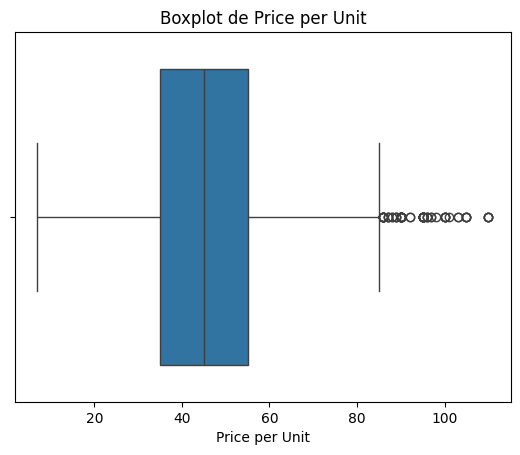

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
679,West Gear,1128299,30/6/2020,West,Washington,Seattle,Women's Apparel,100.0,675.0,135.0,0.20,In-store,6.75
685,West Gear,1128299,6/7/2020,West,Washington,Seattle,Women's Apparel,100.0,575.0,115.0,0.20,In-store,5.75
708,West Gear,1128299,29/7/2020,West,Washington,Seattle,Men's Apparel,90.0,382.5,95.6,0.25,In-store,4.25
709,West Gear,1128299,30/7/2020,West,Washington,Seattle,Women's Apparel,95.0,522.5,104.5,0.20,In-store,5.50
714,West Gear,1128299,4/8/2020,West,Washington,Seattle,Men's Apparel,90.0,427.5,106.9,0.25,In-store,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5862,West Gear,1128299,16/7/2021,South,Louisiana,New Orleans,Women's Athletic Footwear,86.0,14.4,7.8,0.54,Online,0.17
5863,West Gear,1128299,16/7/2021,South,Louisiana,New Orleans,Men's Apparel,86.0,16.3,9.4,0.58,Online,0.19
5864,West Gear,1128299,16/7/2021,South,Louisiana,New Orleans,Women's Apparel,103.0,16.8,8.1,0.48,Online,0.16
5865,West Gear,1128299,17/8/2021,South,Louisiana,New Orleans,Men's Street Footwear,86.0,21.9,11.2,0.51,Online,0.25


In [ ]:
# Price per Unit
def detectar_outliers_iqr(df, columna_objetivo, factor=1.5):
    # Cálculo del IQR
    q1 = df[columna_objetivo].quantile(0.25)
    q3 = df[columna_objetivo].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    # Detección de outliers
    outliers = df[(df[columna_objetivo] < lower_bound) | (df[columna_objetivo] > upper_bound)]

    # Mostrar resultados
    print("Outliers detectados:")
    print("Outliers:\n",outliers[["Retailer", "Product", columna_objetivo]])

    # Visualización
    sns.boxplot(x=df[columna_objetivo])
    plt.title(f'Boxplot de {columna_objetivo}')
    plt.show()

    return outliers

detectar_outliers_iqr(df_cleaned, "Price per Unit")

Outliers detectados:
Outliers:
            Retailer                    Product  Total Sales
0       Foot Locker      Men's Street Footwear        600.0
1       Foot Locker    Men's Athletic Footwear        500.0
2       Foot Locker    Women's Street Footwear        400.0
4       Foot Locker              Men's Apparel        540.0
5       Foot Locker            Women's Apparel        500.0
...             ...                        ...          ...
9402    Foot Locker  Women's Athletic Footwear        960.0
9408    Foot Locker  Women's Athletic Footwear        897.0
9409    Foot Locker              Men's Apparel        920.0
9426  Sports Direct  Women's Athletic Footwear        825.0
9444  Sports Direct  Women's Athletic Footwear        897.0

[655 rows x 3 columns]


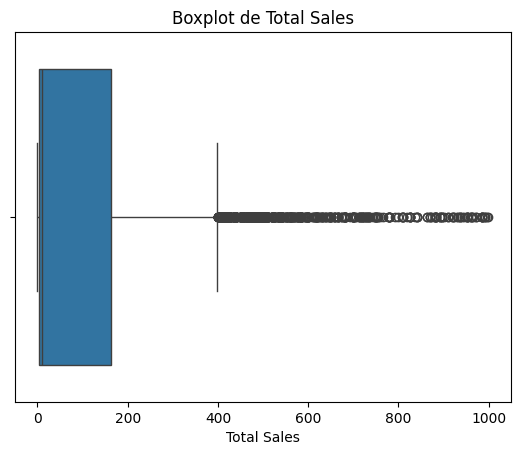

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,600.0,300.0,0.50,In-store,12.0
1,Foot Locker,1185732,2/1/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,500.0,150.0,0.30,In-store,10.0
2,Foot Locker,1185732,3/1/2020,Northeast,New York,New York,Women's Street Footwear,40.0,400.0,140.0,0.35,In-store,10.0
4,Foot Locker,1185732,5/1/2020,Northeast,New York,New York,Men's Apparel,60.0,540.0,162.0,0.30,In-store,9.0
5,Foot Locker,1185732,6/1/2020,Northeast,New York,New York,Women's Apparel,50.0,500.0,125.0,0.25,In-store,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,Foot Locker,1185732,6/9/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,30.0,960.0,442.0,0.46,Outlet,32.0
9408,Foot Locker,1185732,8/10/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,39.0,897.0,404.0,0.45,Outlet,23.0
9409,Foot Locker,1185732,8/10/2021,Northeast,Rhode Island,Providence,Men's Apparel,40.0,920.0,304.0,0.33,Outlet,23.0
9426,Sports Direct,1185732,17/1/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,25.0,825.0,256.0,0.31,Outlet,33.0


In [ ]:
# Total Sales
detectar_outliers_iqr(df_cleaned, "Total Sales")

Outliers detectados:
Outliers:
          Retailer                    Product  Operating Profit
0     Foot Locker      Men's Street Footwear             300.0
6     Foot Locker      Men's Street Footwear             312.5
12    Foot Locker      Men's Street Footwear             305.0
18    Foot Locker      Men's Street Footwear             300.0
24    Foot Locker      Men's Street Footwear             366.0
...           ...                        ...               ...
9625  Foot Locker              Men's Apparel             928.0
9641  Foot Locker    Women's Street Footwear             936.0
9642  Foot Locker  Women's Athletic Footwear             471.0
9643  Foot Locker              Men's Apparel             896.0
9647  Foot Locker    Women's Street Footwear             650.0

[1094 rows x 3 columns]


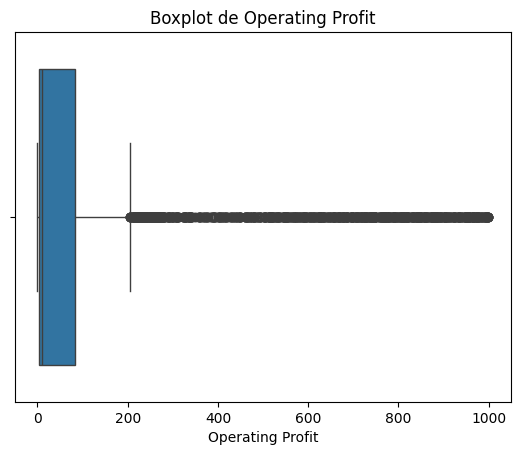

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,600.0,300.0,0.50,In-store,12.00
6,Foot Locker,1185732,7/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,625.0,312.5,0.50,In-store,12.50
12,Foot Locker,1185732,25/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,610.0,305.0,0.50,Outlet,12.20
18,Foot Locker,1185732,31/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,600.0,300.0,0.50,Outlet,12.00
24,Foot Locker,1185732,6/2/2020,Northeast,New York,New York,Men's Street Footwear,60.0,732.0,366.0,0.50,Outlet,12.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9625,Foot Locker,1185732,19/10/2021,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,2.9,928.0,0.32,Outlet,0.06
9641,Foot Locker,1185732,24/1/2021,Northeast,New Hampshire,Manchester,Women's Street Footwear,35.0,3.5,936.0,0.27,Outlet,0.10
9642,Foot Locker,1185732,24/1/2021,Northeast,New Hampshire,Manchester,Women's Athletic Footwear,33.0,1.7,471.0,0.28,Outlet,0.05
9643,Foot Locker,1185732,24/1/2021,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,3.2,896.0,0.28,Outlet,0.06


In [ ]:
# Operating Profit
detectar_outliers_iqr(df_cleaned, "Operating Profit")

Outliers detectados:
Outliers:
            Retailer                    Product  Operating Margin
193       West Gear            Women's Apparel              0.10
199       West Gear            Women's Apparel              0.10
205       West Gear            Women's Apparel              0.10
211       West Gear            Women's Apparel              0.10
4422      West Gear              Men's Apparel              0.74
4488      West Gear              Men's Apparel              0.76
4494      West Gear              Men's Apparel              0.77
4506      West Gear              Men's Apparel              0.73
4752         Kohl's              Men's Apparel              0.75
4758         Kohl's              Men's Apparel              0.72
4764         Kohl's              Men's Apparel              0.71
4770         Kohl's              Men's Apparel              0.74
4776         Kohl's              Men's Apparel              0.74
4782         Kohl's              Men's Apparel            

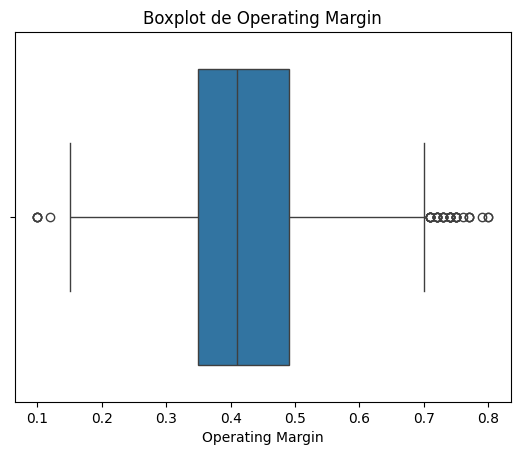

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
193,West Gear,1128299,29/1/2021,West,California,San Francisco,Women's Apparel,70.0,542.5,54.2,0.10,Outlet,7.75
199,West Gear,1128299,4/2/2021,West,California,San Francisco,Women's Apparel,70.0,490.0,49.0,0.10,Outlet,7.00
205,West Gear,1128299,10/2/2021,West,California,San Francisco,Women's Apparel,70.0,542.5,54.2,0.10,Outlet,7.75
211,West Gear,1128299,16/2/2021,West,California,San Francisco,Women's Apparel,70.0,560.0,56.0,0.10,Outlet,8.00
4422,West Gear,1128299,5/2/2020,West,Nevada,Las Vegas,Men's Apparel,59.0,4.8,3.5,0.74,Online,0.08
4488,West Gear,1128299,12/4/2020,West,Colorado,Denver,Men's Apparel,63.0,2.8,2.1,0.76,Online,0.04
4494,West Gear,1128299,18/4/2020,West,Colorado,Denver,Men's Apparel,66.0,6.0,4.6,0.77,Online,0.09
4506,West Gear,1128299,30/4/2020,West,Colorado,Denver,Men's Apparel,74.0,10.4,7.6,0.73,Online,0.14
4752,Kohl's,1189833,1/1/2021,Midwest,Montana,Billings,Men's Apparel,47.0,3.6,2.7,0.75,Online,0.08
4758,Kohl's,1189833,7/1/2021,Midwest,Montana,Billings,Men's Apparel,48.0,2.8,2.0,0.72,Online,0.06


In [ ]:
# Operating Margin
detectar_outliers_iqr(df_cleaned, "Operating Margin")

Outliers detectados:
Outliers:
            Retailer                    Product  Units Sold Cleaned
0       Foot Locker      Men's Street Footwear                12.0
1       Foot Locker    Men's Athletic Footwear                10.0
2       Foot Locker    Women's Street Footwear                10.0
4       Foot Locker              Men's Apparel                 9.0
5       Foot Locker            Women's Apparel                10.0
...             ...                        ...                 ...
9402    Foot Locker  Women's Athletic Footwear                32.0
9408    Foot Locker  Women's Athletic Footwear                23.0
9409    Foot Locker              Men's Apparel                23.0
9426  Sports Direct  Women's Athletic Footwear                33.0
9444  Sports Direct  Women's Athletic Footwear                39.0

[326 rows x 3 columns]


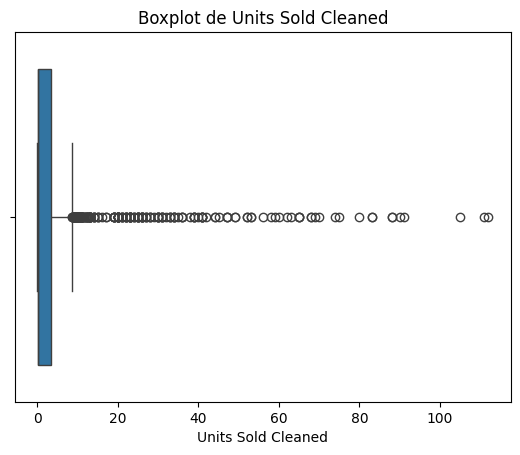

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,600.0,300.0,0.50,In-store,12.0
1,Foot Locker,1185732,2/1/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,500.0,150.0,0.30,In-store,10.0
2,Foot Locker,1185732,3/1/2020,Northeast,New York,New York,Women's Street Footwear,40.0,400.0,140.0,0.35,In-store,10.0
4,Foot Locker,1185732,5/1/2020,Northeast,New York,New York,Men's Apparel,60.0,540.0,162.0,0.30,In-store,9.0
5,Foot Locker,1185732,6/1/2020,Northeast,New York,New York,Women's Apparel,50.0,500.0,125.0,0.25,In-store,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9402,Foot Locker,1185732,6/9/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,30.0,960.0,442.0,0.46,Outlet,32.0
9408,Foot Locker,1185732,8/10/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,39.0,897.0,404.0,0.45,Outlet,23.0
9409,Foot Locker,1185732,8/10/2021,Northeast,Rhode Island,Providence,Men's Apparel,40.0,920.0,304.0,0.33,Outlet,23.0
9426,Sports Direct,1185732,17/1/2021,Northeast,Rhode Island,Providence,Women's Athletic Footwear,25.0,825.0,256.0,0.31,Outlet,33.0


In [ ]:
# Units Sold Cleaned
detectar_outliers_iqr(df_cleaned, "Units Sold Cleaned")

## Tratamiento de Outliers
Si bien los outliers podríamos considerar que se tratan de datos legítimos, podríamos eliminar aquellos detectados por el IQR para practicar

In [ ]:
def detectar_outliers_iqr_sin_grafico(df, columna_objetivo, factor=1.5):
        # Cálculo del IQR
    q1 = df[columna_objetivo].quantile(0.25)
    q3 = df[columna_objetivo].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    # Detección de outliers
    outliers = df[(df[columna_objetivo] < lower_bound) | (df[columna_objetivo] > upper_bound)]
    return outliers

def eliminar_outliers_iqr(df, columna_objetivo, factor=1.5):
    outliers = detectar_outliers_iqr_sin_grafico(df, columna_objetivo, factor)
    df_sin_outliers = df.drop(outliers.index)
    return df_sin_outliers

print(df_cleaned.shape)
df_cleaned = eliminar_outliers_iqr(df_cleaned, "Price per Unit")
df_cleaned = eliminar_outliers_iqr(df_cleaned, "Total Sales")
df_cleaned = eliminar_outliers_iqr(df_cleaned, "Operating Profit")
df_cleaned = eliminar_outliers_iqr(df_cleaned, "Operating Margin")
df_cleaned = eliminar_outliers_iqr(df_cleaned, "Units Sold Cleaned")
print(df_cleaned.shape)

(9648, 13)
(7957, 13)


Podemos observar que se perdieron unas 1691 filas, lo que significa un 17% del dataset original.

# 7 - Transformación y Escalado de Datos
Elegí dos columnas para escalar, simplemente porque tienen el rango más alto de datos:
*  "Total Sales"
*  "Operating Profit"

In [ ]:
# DataFrame normalization with MinMaxScaler
scaler = MinMaxScaler()
df_cleaned[["Total Sales norm", "Operating Profit norm"]]= scaler.fit_transform(df_cleaned[["Total Sales", "Operating Profit"]])
df_cleaned.head(10)

,Retailer,Adidas Sales Database Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Total Sales,Operating Profit,Operating Margin,Sales Method,Units Sold Cleaned,Total Sales norm,Operating Profit norm
70,Sports Direct,1197831,21/7/2020,Northeast,New York,New York,Women's Street Footwear,35.0,245.0,85.8,0.35,Outlet,7.00,0.614343,0.528000
71,Sports Direct,1197831,22/7/2020,Northeast,New York,New York,Women's Athletic Footwear,35.0,245.0,110.2,0.45,Outlet,7.00,0.614343,0.678154
72,Sports Direct,1197831,23/7/2020,South,Texas,Houston,Men's Apparel,40.0,220.0,66.0,0.30,Outlet,5.50,0.551655,0.406154
73,Sports Direct,1197831,24/7/2020,South,Texas,Houston,Women's Apparel,35.0,245.0,122.5,0.50,Outlet,7.00,0.614343,0.753846
76,Sports Direct,1197831,27/7/2020,South,Texas,Houston,Women's Street Footwear,35.0,236.2,82.7,0.35,Outlet,6.75,0.592277,0.508923
77,Sports Direct,1197831,28/7/2020,South,Texas,Houston,Women's Athletic Footwear,35.0,218.8,98.4,0.45,Outlet,6.25,0.548646,0.605538
78,Sports Direct,1197831,29/7/2020,South,Texas,Houston,Men's Apparel,40.0,200.0,60.0,0.30,Outlet,5.00,0.501505,0.369231
79,Sports Direct,1197831,30/7/2020,South,Texas,Houston,Women's Apparel,35.0,245.0,122.5,0.50,Outlet,7.00,0.614343,0.753846
82,Sports Direct,1197831,2/8/2020,South,Texas,Houston,Women's Street Footwear,35.0,245.0,85.8,0.35,Outlet,7.00,0.614343,0.528000
83,Sports Direct,1197831,3/8/2020,South,Texas,Houston,Women's Athletic Footwear,40.0,240.0,108.0,0.45,Outlet,6.00,0.601805,0.664615


# 8 - Análisis de Distribución de Datos
*  Variables numéricas
*  Variables categóricas

## Variables Numéricas
* "Price per Unite"
* "Total Sales"
* "Operating Profit"
* "Operating Margin"
* "Units Sold Cleaned"

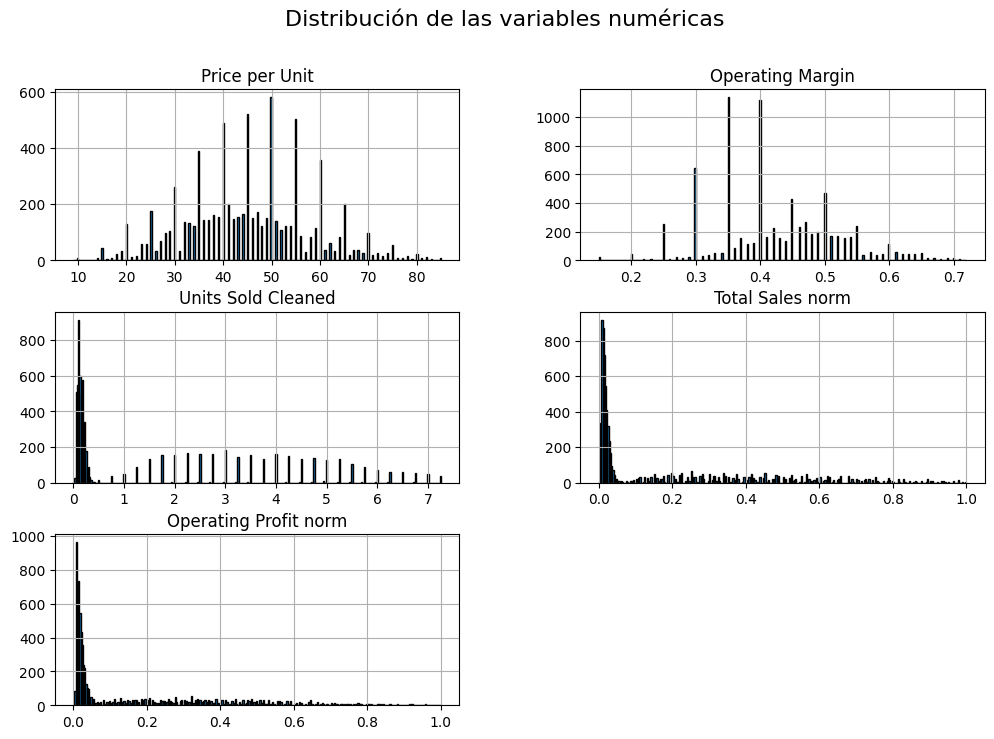

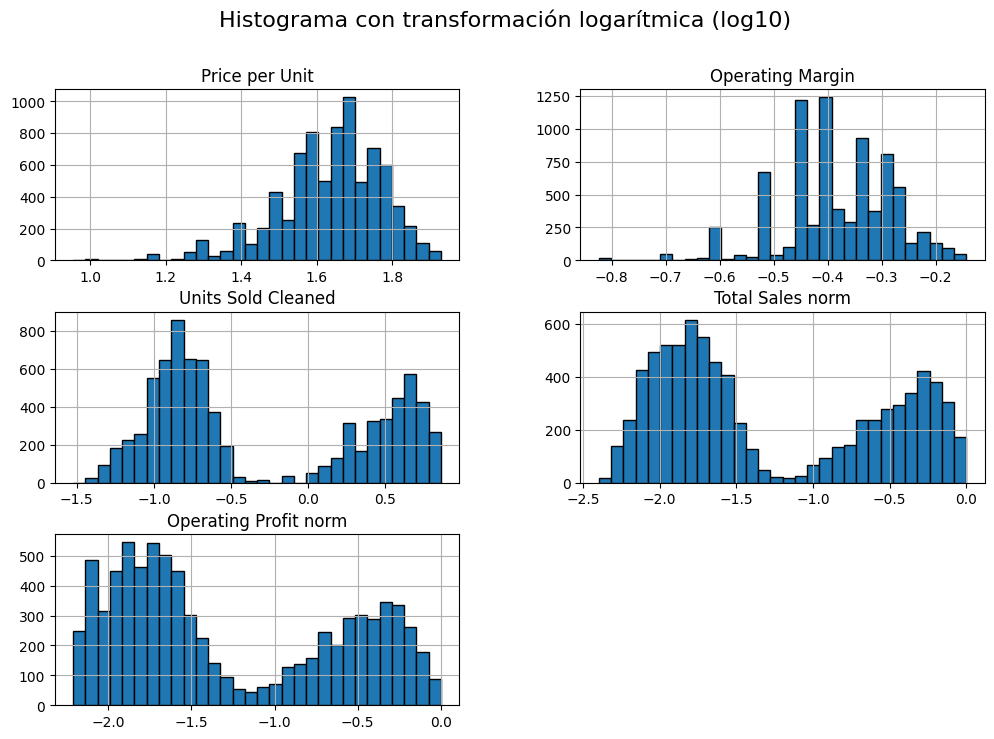

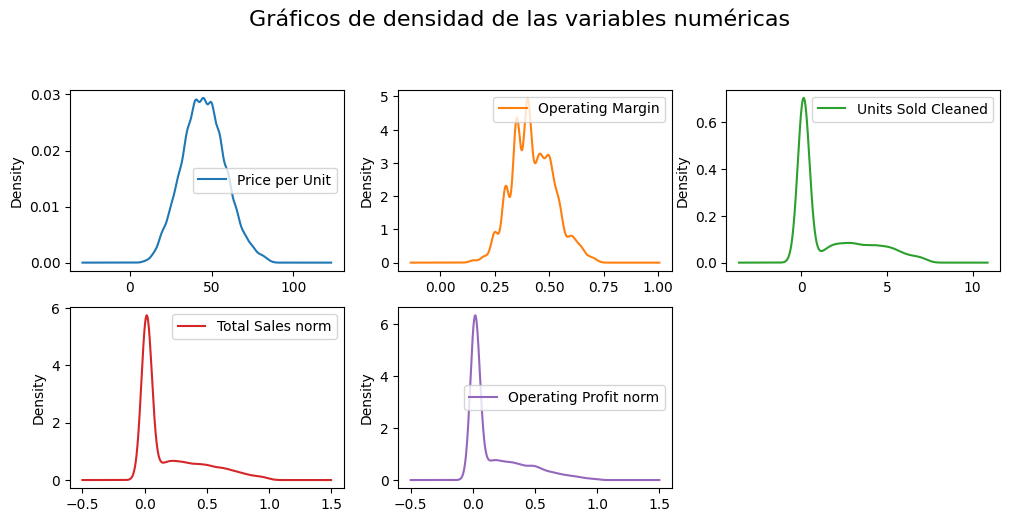

In [ ]:
# Histograma para visualizar la distribución de cada variable numérica
columnas_a_omitir = ["Adidas Sales Database Retailer ID","Total Sales", "Operating Profit"]
columnas_numericas = df_cleaned.select_dtypes(include='number').drop(columns=columnas_a_omitir)

columnas_numericas.hist(figsize=(12, 8), bins=300, edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()

"""
Como es hay una fuerte asimetría en las distribuciones de las variables numéricas, aplicamos logaritmo a las mismas para mejorar la visualización.
"""
# Aplicar log10 solo a los valores > 0
df_log = columnas_numericas[columnas_numericas > 0].apply(np.log10)
# Graficar
df_log.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograma con transformación logarítmica (log10)", fontsize=16)
plt.show()

# Gráficos de densidad para una mejor visualización de la distribución
columnas_numericas.plot(kind='density', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False)
plt.suptitle("Gráficos de densidad de las variables numéricas", fontsize=16)
plt.show()

## Variables Categóricas
* "Region"
* "State City"
* "Date"

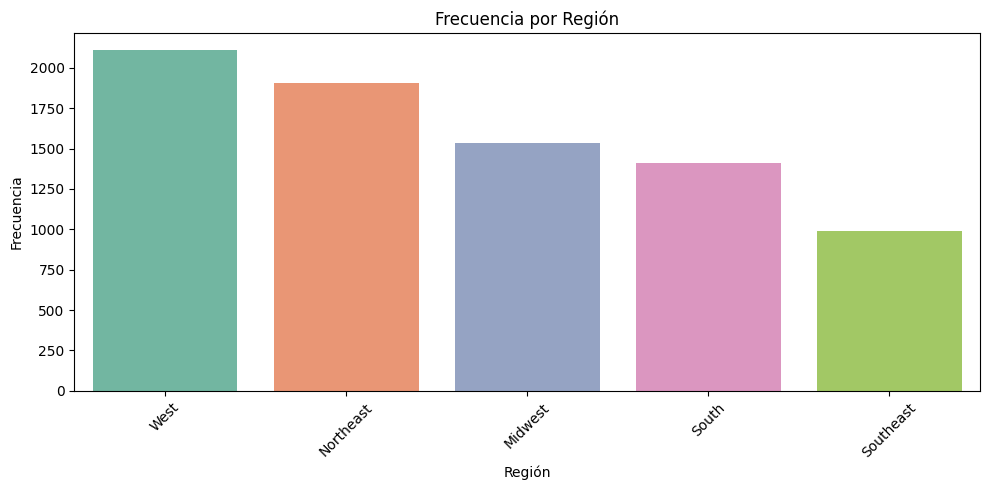

In [ ]:
# Región
plt.figure(figsize=(10, 5))
region_counts = df_cleaned["Region"].value_counts().sort_values(ascending=False)
sns.barplot(x=region_counts.index, y=region_counts.values, palette="Set2")
plt.title("Frecuencia por Región")
plt.xlabel("Región")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

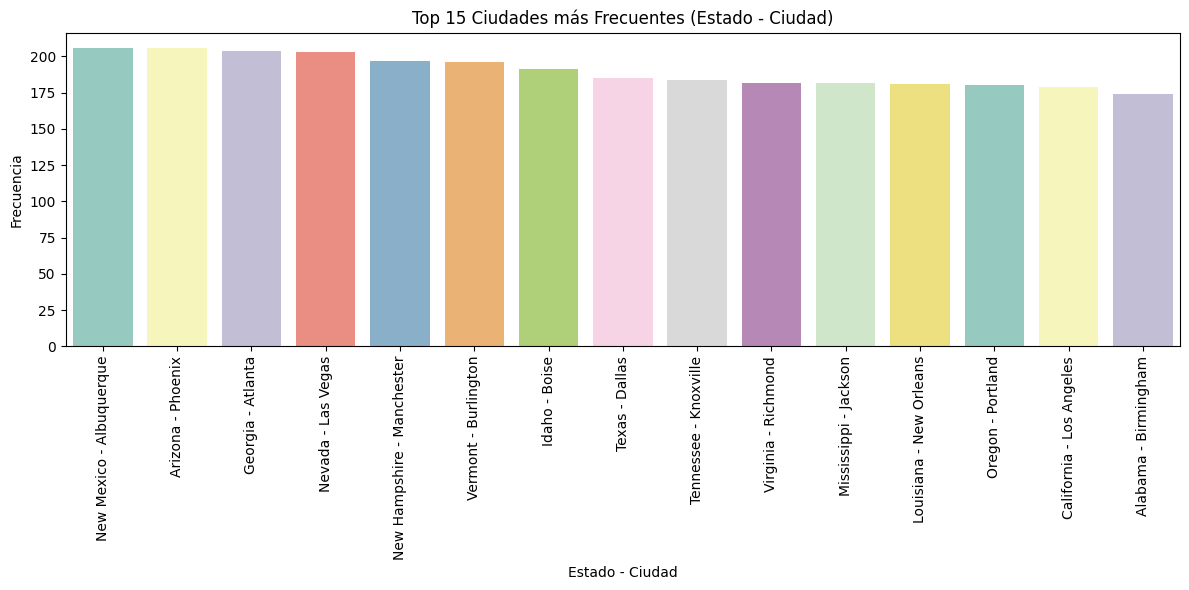

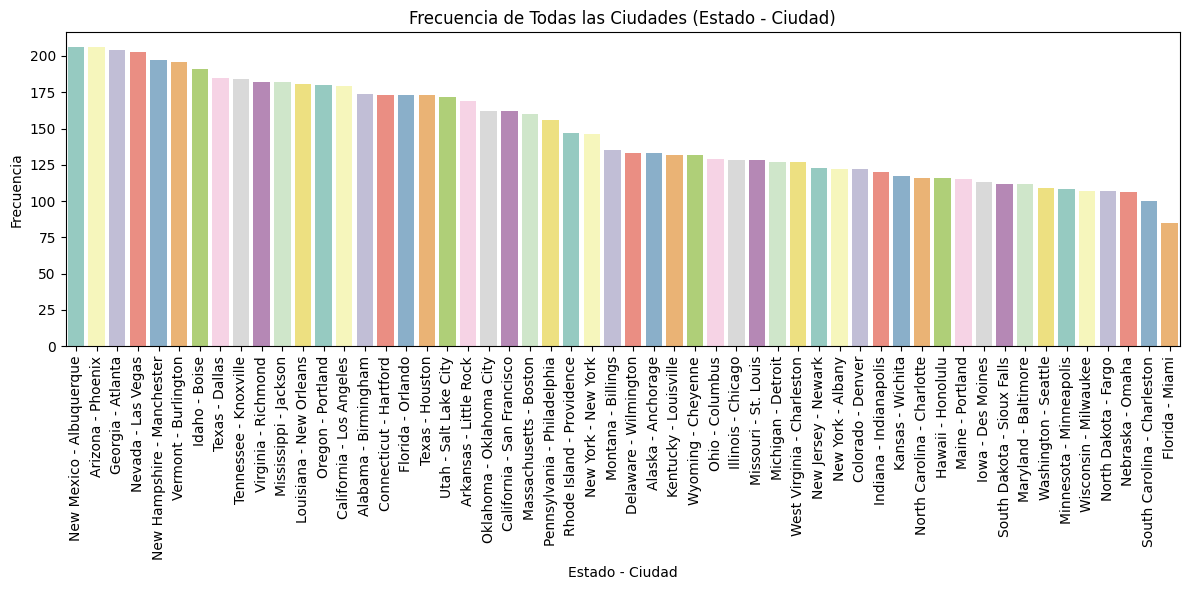

In [ ]:
# State City -> Aprovechamos y generamos una nueva columna con el estado y la ciudad
df_cleaned["State - City"] = df_cleaned["State"] + " - " + df_cleaned["City"]

plt.figure(figsize=(12, 6))
top_state_cities = df_cleaned["State - City"].value_counts().nlargest(15)
sns.barplot(x=top_state_cities.index, y=top_state_cities.values, palette="Set3")
plt.title("Top 15 Ciudades más Frecuentes (Estado - Ciudad)")
plt.xlabel("Estado - Ciudad")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
top_state_cities = df_cleaned["State - City"].value_counts()
sns.barplot(x=top_state_cities.index, y=top_state_cities.values, palette="Set3")
plt.title("Frecuencia de Todas las Ciudades (Estado - Ciudad)")
plt.xlabel("Estado - Ciudad")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

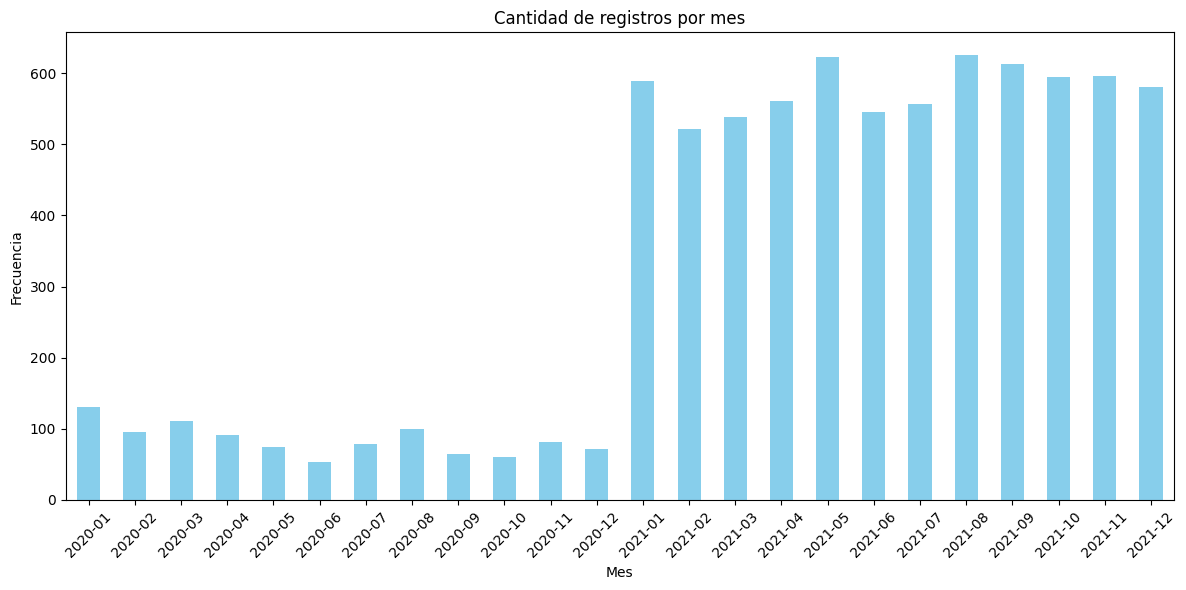

In [ ]:
# Date
df_cleaned["Invoice Date"] = pd.to_datetime(df_cleaned["Invoice Date"], errors='coerce')

# Agrupar por mes
df_by_month = df_cleaned["Invoice Date"].dt.to_period("M").value_counts().sort_index()

plt.figure(figsize=(12, 6))
df_by_month.plot(kind='bar', color='skyblue')
plt.title("Cantidad de registros por mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 9 - Análisis de Correlación de Variables

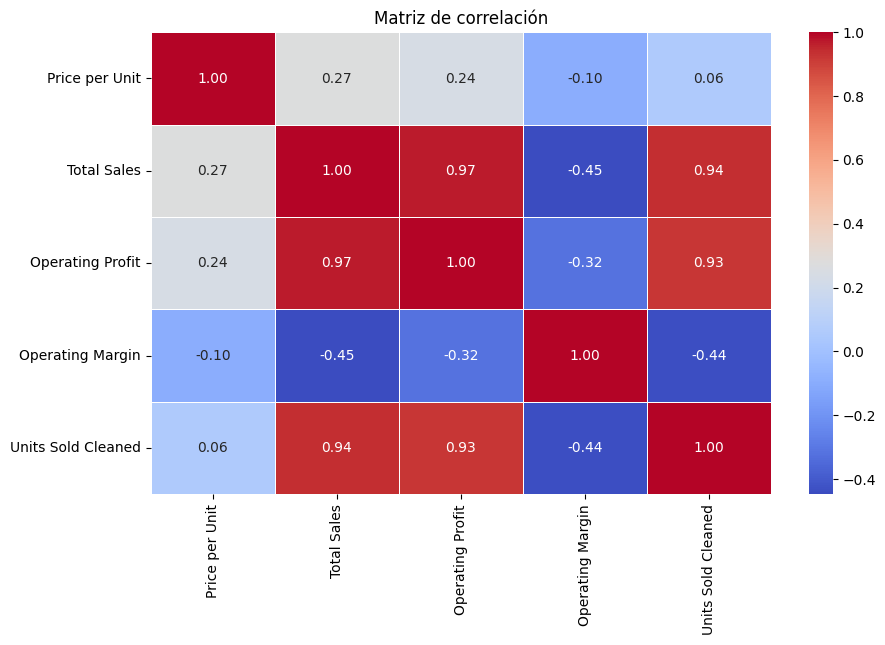

In [ ]:
# Matriz de correlación
# correlation_matrix = df_cleaned.corr(), parecería que no puede disernir en este caso que la columna "Retailer" no es una columna numérica
columnas_a_excluir = ["Total Sales norm", "Operating Profit norm", "Adidas Sales Database Retailer ID"]

# Seleccionamos solo las columnas numéricas, excluyendo las que no queremos
columnas_numericas = df_cleaned.select_dtypes(include=["number"]).drop(columns=columnas_a_excluir, errors="ignore")
correlation_matrix = columnas_numericas.corr()
# Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

Se puede observer una clara correlacion entre:
* El beneficio por operacion y el total de la venta
* El beneficio por operacion y la cantidad de unidades vendidas del producto
* El total de la venta y la cantidad de unidades vendidas del producto

# 10 - Análisis de Relaciones entre Variables

## Relación entre variables numéricas
Además de la correlación vista con el heatmap anterior, podemos con un pairplot ver los gráficos de dispersion de las combinaciones

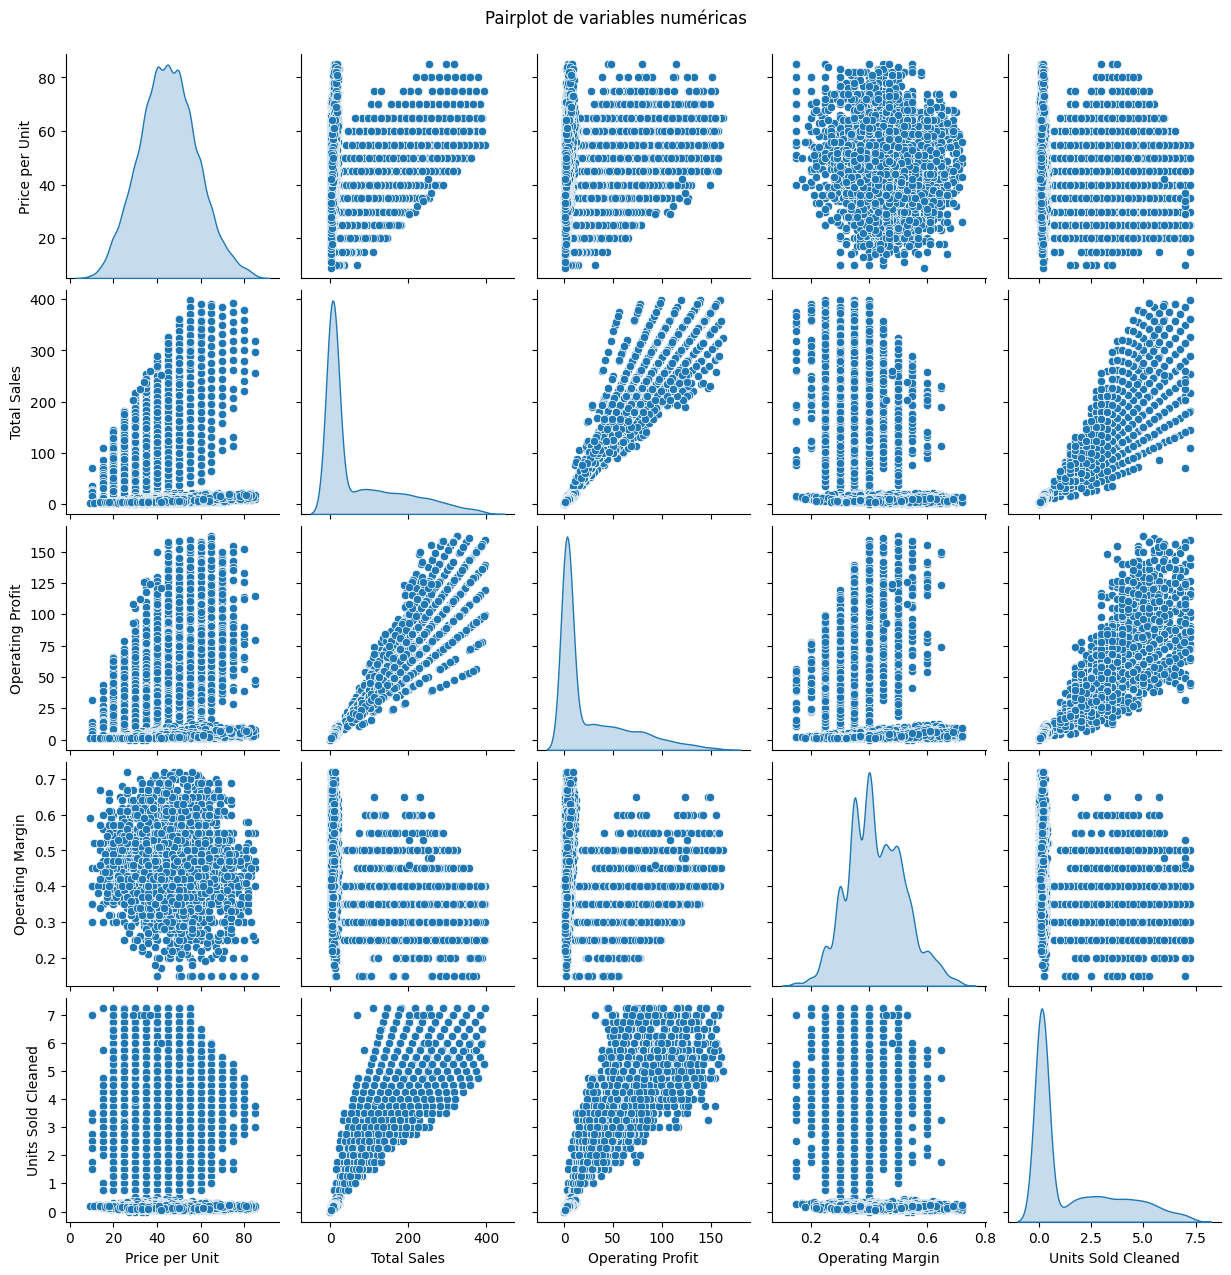

In [ ]:
# Pairplot para visualizar relaciones entre múltiples variables
columnas_a_excluir = ["Total Sales norm", "Operating Profit norm", "Adidas Sales Database Retailer ID"]
# Seleccionamos solo las columnas numéricas, excluyendo las que no queremos
columnas_numericas = df_cleaned.select_dtypes(include=["number"]).drop(columns=columnas_a_excluir, errors="ignore")

sns.pairplot(columnas_numericas, diag_kind="kde")
plt.suptitle("Pairplot de variables numéricas", y=1.02)
plt.show()


En algunas variables no se observa una relación directa, pero en las que se nombró anteriormente en el heatmap podemos ver una distribución de puntos lineal positiva (correspondiente a una proporcionalidad positiva).

## Relación entre variables categóricas

Un análisis interesante que podráimos hacer es sobre la cantidad de ventas (registros/filas) por cada uno de los estados. Pero debido a que hay demasiados estados considero trabajar con el top 5 y el resto agrupado en "Otros"

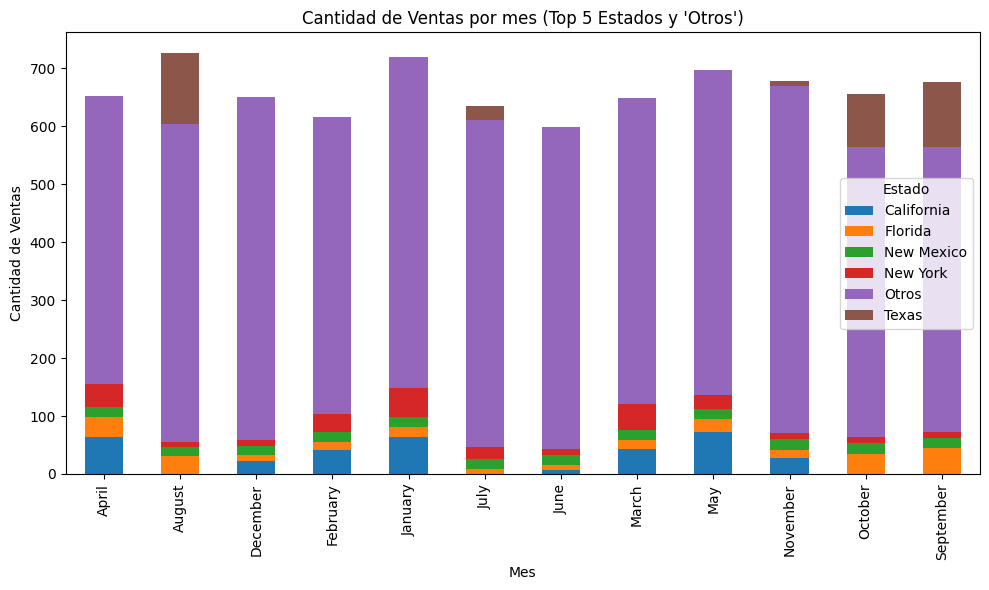

In [ ]:
df_copy = df_cleaned
top_states = df_copy['State'].value_counts().head(5).index
df_copy['State_grouped'] = df_copy['State'].apply(
    lambda x: x if x in top_states else 'Otros'
)

# Agrupar y graficar
# Primero debemos generar otra columna para cada mes a partir de la "Invoice Date"
df_copy["Invoice Date"] = pd.to_datetime(df_copy["Invoice Date"], errors='coerce')
df_copy["Month"] = df_copy["Invoice Date"].dt.month_name()
df_copy.groupby(['Month', 'State_grouped']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(10, 6)
)

plt.title("Cantidad de Ventas por mes (Top 5 Estados y 'Otros')")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Ventas")
plt.legend(title="Estado")
plt.tight_layout()
plt.show()

## Relación entre variables Numéricas y Categóricas
* Total de las Ventas por estado

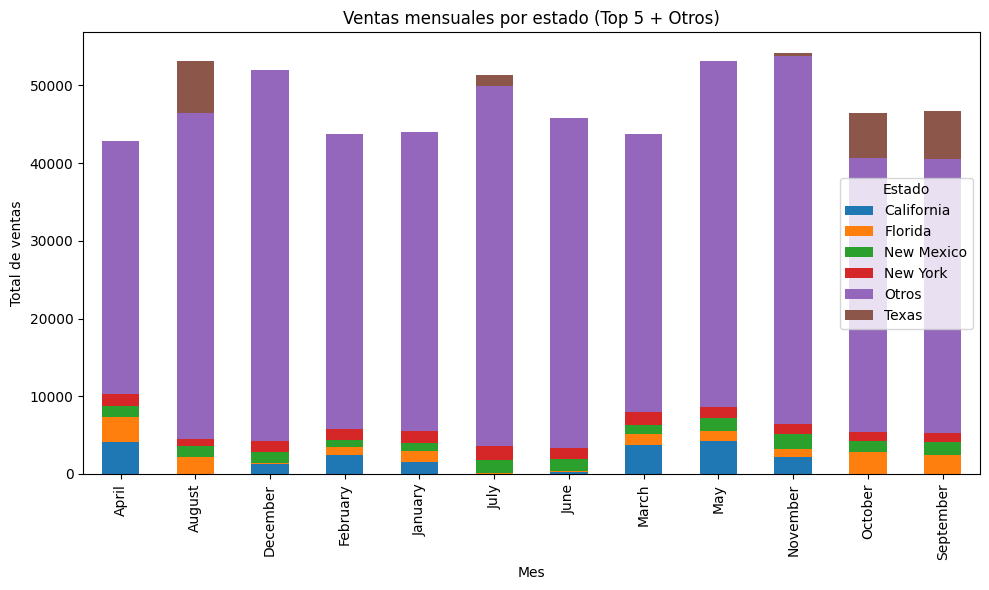

In [ ]:
ventas_grouped = df_copy.groupby(['Month', 'State_grouped'])['Total Sales'].sum().unstack()

# Graficar
ventas_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Ventas mensuales por estado (Top 5 + Otros)")
plt.xlabel("Mes")
plt.ylabel("Total de ventas")
plt.legend(title="Estado")
plt.tight_layout()
plt.show()

# Sobre los puntos restantes
#12.	Análisis de la distribución de valores faltantes
#13.	Tratamiento de valores faltantes
#14.	Detección y tratamiento de valores atípicos
#15.	Transformación y escalado de variables
Considero que estos puntos ya fueron tratados:
- (12-13) Lamentablemente no existen valores faltantes en este dataset, por lo que no se pueden tratar o ver su distribución. Lo único que se pudo hacer es eliminar la columna vacía.
- 14 Se eliminaron los outliers (previamente se realizó un análisis con ellos) del dataset
- 15 se escalaron/normalizaron las variables con mayor rango (Operating Profit y Total Sales).

In [ ]:
from google.colab import drive
from google.colab import files

def convertir_numeros_a_string_coma(df):
    df_copy = df.copy()  # Para no modificar el DataFrame original

    for col in df_copy.select_dtypes(include=['float', 'int']).columns:
        df_copy[col] = df_copy[col].apply(lambda x: f"{x:.2f}".replace('.', ',') if pd.notna(x) else '')

    return df_copy

df_copy = convertir_numeros_a_string_coma(df_cleaned)

df_copy.to_csv('dataset_limpio.csv', index=False, encoding='utf-8-sig')

files.download('dataset_limpio.csv')

# Enlace al Looker Studio:
# https://lookerstudio.google.com/s/vqG9LZzPL6o


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>